## Comment exécuter son code en Python ?
1. En écrivant un fichier `.py` et en l'exécutant depuis le terminal.
2. En tappant directement ses commandes dans la console
3. En utilisant un IDE/Editeur de texte et en exécutant tout un fichier
4. En utilisant un IDE/Edt et en exécutant des portions de code
5. En utilisant des notebooks jupyter et en exécutant des cellules séparément

En créant un binder :
  - En ligne en utilisant [mybinder.org](mybinder.org/) et en pointant vers un repo github --> facile
  - En local en utilisant repo2docker --> pas très dur (non conseillé pour de la mise en production).

### Quel Python j'exécute ?

In [34]:
import sys

print(sys.executable)

/srv/conda/envs/notebook/bin/python


In [35]:
import sys

In [36]:
sys.implementation

namespace(name='cpython',
          cache_tag='cpython-37',
          version=sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0),
          hexversion=50793712,
          _multiarch='x86_64-linux-gnu')

### D'où vient un kernel lancé par jupyter ?

In [37]:
sys.argv

['/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py',
 '-f',
 '/home/adrienpacifico/.local/share/jupyter/runtime/kernel-4dea777f-718e-44e9-b4d4-ea1961b52679.json']

In [32]:
ipykernel_launcher_path = sys.argv[0]

In [33]:
file_o=open(ipykernel_launcher_path) 
content=file_o.read()
print(content)                     

"""Entry point for launching an IPython kernel.

This is separate from the ipykernel package so we can avoid doing imports until
after removing the cwd from sys.path.
"""

import sys

if __name__ == '__main__':
    # Remove the CWD from sys.path while we load stuff.
    # This is added back by InteractiveShellApp.init_path()
    if sys.path[0] == '':
        del sys.path[0]

    from ipykernel import kernelapp as app
    app.launch_new_instance()



In [39]:
file_o=open(sys.argv[2]) 
content=file_o.read()
print(content)                     

{
  "shell_port": 50857,
  "iopub_port": 46131,
  "stdin_port": 45097,
  "control_port": 41277,
  "hb_port": 56029,
  "ip": "127.0.0.1",
  "key": "48938bea-a57ceb5525a21bbd62037b61",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}


### Installer une librairie

#### Dans un environement virtuel

Aller dans la console dans son environnement virtuel et lancer la commande

`pip -m install nom_du_package`

Pourquoi `-m` la réponse est ici (surtout si vous êtes sous Windows) : https://snarky.ca/why-you-should-use-python-m-pip/

In [40]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I learned sometime ago that we should be doing<br>`python -m pip install ...` instead of simply `pip install ...` but now I can&#39;t remember the source of this information. Likely from <a href="https://twitter.com/brettsky?ref_src=twsrc%5Etfw">@brettsky</a> or <a href="https://twitter.com/zooba?ref_src=twsrc%5Etfw">@zooba</a>, any of you have a talk/blog post on this, so I can share with people?</p>&mdash; Mariatta 🤦 (@mariatta) <a href="https://twitter.com/mariatta/status/1189243515739561985?ref_src=twsrc%5Etfw">October 29, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

#### Directement dans un jupyter notebook (qui va utiliser l'environement virtuel du Kernel)

In [41]:
%pip install u8darts # ceci est un Ipython magic command (voir plus bas).

     |████████████████████████████████| 359 kB 3.2 MB/s            
     |████████████████████████████████| 2.0 MB 59.9 MB/s            
     |████████████████████████████████| 9.8 MB 19.4 MB/s            
     |████████████████████████████████| 24.8 MB 138.3 MB/s            
     |████████████████████████████████| 76 kB 5.7 MB/s              
     |████████████████████████████████| 306 kB 5.9 MB/s            
     |████████████████████████████████| 38.1 MB 91.6 MB/s            
     |████████████████████████████████| 172 kB 19.3 MB/s            
     |████████████████████████████████| 845 kB 142.0 MB/s            
     |████████████████████████████████| 11.2 MB 34.7 MB/s            
     |████████████████████████████████| 47 kB 7.2 MB/s             
     |████████████████████████████████| 4.3 MB 39.7 MB/s            
     |████████████████████████████████| 1.1 MB 112.1 MB/s            
     |████████████████████████████████| 899 kB 29.3 MB/s            
     |█████████████████████████

In [1]:
import darts

#### Si on utilise conda/mini-conda (c'est le cas ici):
[Documentations officielle](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html)

1- Essayer d'installer via la commande `conda install nom_du_package`
2- Si le package n'existe pas, essayer de voir s'il existe via conda-forge
3- Si le package n'est pas soutenu sur conda forge, l'installer via `pip install nom_du_package`
4- Si le package n'est pas sur pypy 

#### Si le package n'est pas dispnible via `pip install nom_du_package` (le package n'est pas sur PyPI -- The Python Package Index):
1. Si le package est sur github/gitlab/autre (et qu'il y a un `setup.py` ou un `pyproject.toml`), on peut soit:
    1. Le cloner (git clone), se mettre dans le dossier puis faire `pip install -e .`
    2. Ou directement via pip:  `pip install git+https://github.com/tangentlabs/django-oscar-paypal.git@issue/34/oscar-0.6` (attention crée un dossier `src` dans le dossier d'où vous exécutez la commande)

### Obtenir de l'aide sur un package

In [10]:
import pandas as pd

In [11]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

### Ipython

Tutoriel Ipython : https://github.com/ipython/ipython-in-depth/tree/7e5ce96cc9251083979efdfc393425f1229a4a68

Ipython vient avec des commandes magiques !

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [12]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [13]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

`%%time` va permettre de savoir en combien de temps s'exécute une commande

In [14]:
%%time
for a in range(10**7):
    a*3
    

CPU times: user 890 ms, sys: 0 ns, total: 890 ms
Wall time: 889 ms


`%%timeit` va permettre de savoir en combien de temps en moyenne une commande s'exécute.

In [15]:
%%timeit
for a in range(10**7):
    a*3
    

645 ms ± 60.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Executer une commande shell

`!` permet d'excuter des commandes du shell

In [1]:
!pwd

/home/adrienpacifico/python


In [2]:
!ls

0-Mettre_en_place_son_environnement_jupyter.ipynb
1-python_introduction.ipynb
2-zen_of_python.ipynb
3-load_modules.ipynb
4-Functions.ipynb
5-View_vs_copy.ipynb
6-assert_et_try_except.ipynb
7-os.ipynb
8-booléen_et_operateurs.ipynb
data
Introduction.ipynb


In [8]:
!sudo apt-get install ping

/bin/bash: sudo: command not found


In [3]:
!ping googlglggle.com

/bin/bash: ping: command not found


In [7]:
! ipconfig

/bin/bash: ipconfig: command not found


La commande `?`

In [20]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [21]:
import time

In [22]:
time?

Type:        module
String form: <module 'time' (built-in)>
Docstring:  
This module provides various functions to manipulate time values.

There are two standard representations of time.  One is the number
of seconds since the Epoch, in UTC (a.k.a. GMT).  It may be an integer
or a floating point number (to represent fractions of seconds).
The Epoch is system-defined; on Unix, it is generally January 1st, 1970.
The actual value can be retrieved by calling gmtime(0).

The other representation is a tuple of 9 integers giving local time.
The tuple items are:
  year (including century, e.g. 1998)
  month (1-12)
  day (1-31)
  hours (0-23)
  minutes (0-59)
  seconds (0-59)
  weekday (0-6, Monday is 0)
  Julian day (day in the year, 1-366)
  DST (Daylight Savings Time) flag (-1, 0 or 1)
If the DST flag is 0, the time is given in the regular time zone;
if it is 1, the time is given in the DST time zone;
if it is -1, mktime() should guess based on the date and time.


In [23]:
time.daylight?

Type:        int
String form: 0
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


In [24]:
time.daylight

0

In [25]:
time.daylight()

TypeError: 'int' object is not callable

#### Output history

In [26]:
2+10

12

In [27]:
_ + 5

TypeError: can only concatenate str (not "int") to str

In [30]:
%history -n 1-5

   1: import sys
   2: sys.implementation
   3: sys.argv
   4:
file_o=open('/home/adrienpacifico/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py') 
content=file_o.read()
print(content)
   5:
file_o=open('/home/adrienpacifico/.local/share/jupyter/runtime/kernel-d48813bb-e3ba-4f59-8873-e2f88900f297.json') 
content=file_o.read()
print(content)


In [4]:
_i

'%history -n 1-5'

In [7]:
_

'[]'

In [2]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [32]:
%env

{'SHELL': '/bin/bash',
 'SESSION_MANAGER': 'local/pop-os:@/tmp/.ICE-unix/3815,unix/pop-os:/tmp/.ICE-unix/3815',
 'QT_ACCESSIBILITY': '1',
 'COLORTERM': 'truecolor',
 'XDG_CONFIG_DIRS': '/etc/xdg/xdg-pop:/etc/xdg',
 'XDG_MENU_PREFIX': 'gnome-',
 'GNOME_DESKTOP_SESSION_ID': 'this-is-deprecated',
 'GTK_IM_MODULE': 'ibus',
 'CONDA_EXE': '/home/adrienpacifico/anaconda3/bin/conda',
 '_CE_M': '',
 'LANGUAGE': 'fr_FR:en',
 'MANDATORY_PATH': '/usr/share/gconf/pop.mandatory.path',
 'LC_ADDRESS': 'fr_FR.UTF-8',
 'GNOME_SHELL_SESSION_MODE': 'pop',
 'LC_NAME': 'fr_FR.UTF-8',
 'SSH_AUTH_SOCK': '/run/user/1000/keyring/ssh',
 'XMODIFIERS': '@im=ibus',
 'DESKTOP_SESSION': 'pop',
 'LC_MONETARY': 'fr_FR.UTF-8',
 'SSH_AGENT_PID': '3785',
 'GTK_MODULES': 'gail:atk-bridge:appmenu-gtk-module',
 'PWD': '/home/adrienpacifico/Projects/cours/python_for_data_science',
 'LOGNAME': 'adrienpacifico',
 'XDG_SESSION_DESKTOP': 'pop',
 'XDG_SESSION_TYPE': 'x11',
 'CONDA_PREFIX': '/home/adrienpacifico/anaconda3/envs/pyth

### Le debugger (ipdb)

In [33]:
import matplotlib.pyplot as plt

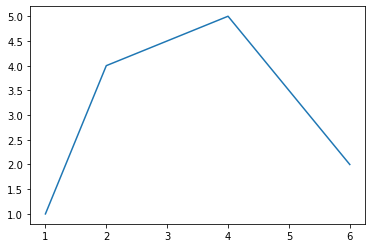

In [34]:
plt.plot([1,2,4,6], [1,4,5,2])

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

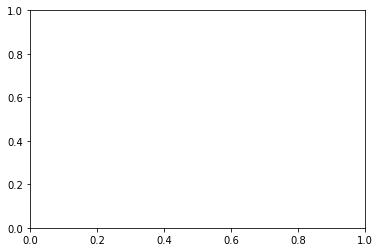

In [38]:
plt.plot([1,2,4,6], [1,4,5,2, 8], )

In [36]:
%debug

> /home/adrienpacifico/anaconda3/envs/pfds_new/lib/python3.8/site-packages/matplotlib/axes/_base.py(501)_plot_args()
    499 
    500         if x.shape[0] != y.shape[0]:
--> 501             raise ValueError(f"x and y must have same first dimension, but "
    502                              f"have shapes {x.shape} and {y.shape}")
    503         if x.ndim > 2 or y.ndim > 2:



ipdb>  u


> /home/adrienpacifico/anaconda3/envs/pfds_new/lib/python3.8/site-packages/matplotlib/axes/_base.py(315)__call__()
    313                 this += args[0],
    314                 args = args[1:]
--> 315             yield from self._plot_args(this, kwargs)
    316 
    317     def get_next_color(self):



ipdb>  args


self = <matplotlib.axes._base._process_plot_var_args object at 0x7fbc596d6f40>
data = None
args = []
kwargs = {}


ipdb>  type(args)


<class 'list'>


ipdb>  self


ipdb>  quit


In [46]:
import pdb

In [47]:
pdb.set_trace()

--Call--
> /home/adrienpacifico/.local/lib/python3.8/site-packages/IPython/core/displayhook.py(252)__call__()
    250         sys.stdout.flush()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.
    254 



ipdb>  u


> <ipython-input-47-54799d9a0260>(1)<module>()
----> 1 pdb.set_trace()



ipdb>  u


*** all frames above hidden


ipdb>  d


> /home/adrienpacifico/.local/lib/python3.8/site-packages/IPython/core/displayhook.py(252)__call__()
    250         sys.stdout.flush()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.
    254 



ipdb>  d


*** Newest frame
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


### La pep8, le style et les linter 

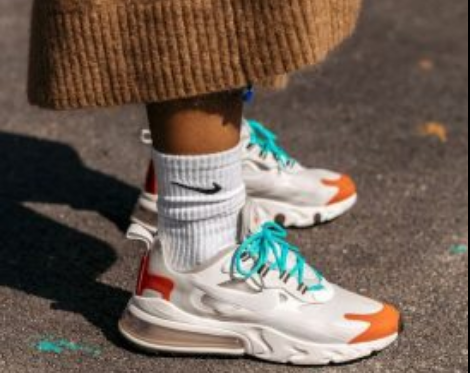

Pour que le code fonctionne, il faut que la *syntaxe* de python soit respectée.  
Pour qu'il soit facilement lisible entre personnes différentes, il est bien de respecter certaines règles de style.

La règle officielle est la [pep8](https://peps.python.org/pep-0008/) : [PEP 8 – Style Guide for Python Code](https://peps.python.org/pep-0008/)



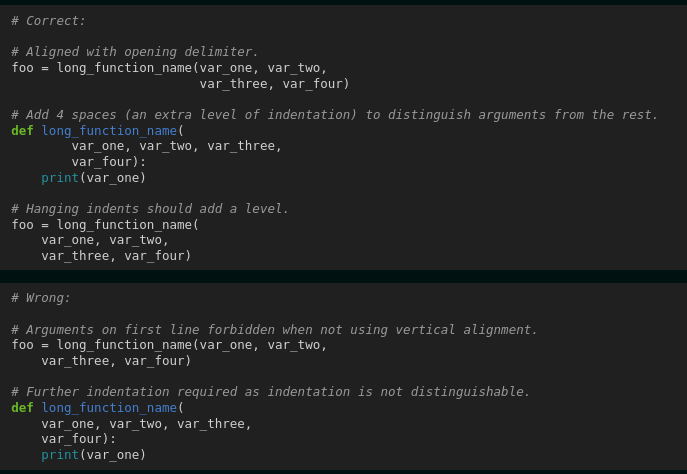

In [4]:
# Wrong:
# operators sit far away from their operands
income = (
    gross_wages
    + taxable_interest
    + (dividends - qualified_dividends)
    - ira_deduction
    - student_loan_interest
)


# Correct:
# easy to match operators with operands
income = (
    gross_wages
    + taxable_interest
    + (dividends - qualified_dividends)
    - ira_deduction
    - student_loan_interest
)

NameError: name 'gross_wages' is not defined

Il est possible d'activer des linter pour indiquer si le style ou la syntaxe est correcte dans les différents IDE.

Sous Jupyter, il n'y a pas de bon linter de disponible pour repérer facilement les erreurs (à part en utilisant [jupyterlab-lsp](https://github.com/jupyter-lsp/jupyterlab-lsp) mais qui a tendance à ralentir parfois fortement les notebooks).

Pour respecter le style on peut aussi utiliser des code formatter comme autopep8 ou black.

Enfin pour peut utiliser des outils *d'analyse statique de code* qui vont nous indiquer des erreurs de syntaxe, de style, ou des mauvaises pratiques.

Un exemple pylint permet de noter votre code !

Tous ces outils s'appliquent généralement à des fichiers `.py` mais depuis peu, la librairie `nbqa` permet d'appliquer ceci aux notebooks également !

In [6]:
!nbqa pylint 1-python_introduction.ipynb

************* Module 1-python_introduction
1-python_introduction.ipynb:cell_6:1:36: C0303: Trailing whitespace (trailing-whitespace)
1-python_introduction.ipynb:cell_6:3:14: C0303: Trailing whitespace (trailing-whitespace)
1-python_introduction.ipynb:cell_7:1:24: C0303: Trailing whitespace (trailing-whitespace)
1-python_introduction.ipynb:cell_7:3:14: C0303: Trailing whitespace (trailing-whitespace)
1-python_introduction.ipynb:cell_15:4:0: C0303: Trailing whitespace (trailing-whitespace)
1-python_introduction.ipynb:cell_16:4:0: C0303: Trailing whitespace (trailing-whitespace)
1-python_introduction.ipynb:cell_1:0:0: C0103: Module name "1-python_introduction" doesn't conform to snake_case naming style (invalid-name)
1-python_introduction.ipynb:cell_1:0:0: C0114: Missing module docstring (missing-module-docstring)
1-python_introduction.ipynb:cell_2:1:0: W0404: Reimport 'sys' (imported line 2) (reimported)
1-python_introduction.ipynb:cell_2:1:0: C0413: Import "import sys" should be placed 

In [13]:
!nbqa flake8 1-python_introduction.ipynb

1-python_introduction.ipynb:cell_2:1:1: E402 module level import not at top of file
1-python_introduction.ipynb:cell_6:1:7: E225 missing whitespace around operator
1-python_introduction.ipynb:cell_6:1:37: W291 trailing whitespace
1-python_introduction.ipynb:cell_6:2:8: E225 missing whitespace around operator
1-python_introduction.ipynb:cell_6:3:15: W291 trailing whitespace
1-python_introduction.ipynb:cell_7:1:7: E225 missing whitespace around operator
1-python_introduction.ipynb:cell_7:1:25: W291 trailing whitespace
1-python_introduction.ipynb:cell_7:2:8: E225 missing whitespace around operator
1-python_introduction.ipynb:cell_7:3:15: W291 trailing whitespace
1-python_introduction.ipynb:cell_10:1:1: F401 'darts' imported but unused
1-python_introduction.ipynb:cell_10:1:1: E402 module level import not at top of file
1-python_introduction.ipynb:cell_11:1:1: E402 module level import not at top of file
1-python_introduction.ipynb:cell_15:4:1: W293 blank line contains whitespace
1-python_in

In [12]:
%pip install flake8

Note: you may need to restart the kernel to use updated packages.
